<a href="https://colab.research.google.com/github/Shreyas0812/AI_Lab_Puzzles/blob/main/P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #Scientific computing
import matplotlib.pyplot as plt #plotiing
import seaborn as sns #plot styling
import pandas as pd
plt.style.use("ggplot") #setting stylr
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8 #setting default window size 12x8/

In [4]:
df = pd.read_csv('bank-full.csv', sep =';')#read data
df.head()#first 5 entries

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [6]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['month'] = le.fit_transform(df['month'])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,OUTPUT_LABEL
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no,0


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,OUTPUT_LABEL
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no,0


In [9]:
df_data = df.drop(['y'], axis=1)

In [10]:
df_data.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,OUTPUT_LABEL
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0


In [11]:
df_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'OUTPUT_LABEL'],
      dtype='object')

In [12]:
'''
scores = df_data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']].values
'''
#scores = df_data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','campaign', 'pdays', 'previous', 'poutcome']].values
scores = ['age', 'balance', 'day', 'month', 'duration']
results = df_data['OUTPUT_LABEL'].values

In [13]:
passed = (results == 1).reshape(45211,1)
failed = (results == 0).reshape(45211,1)

In [37]:
ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color='green',
                     s = 60)

sns.scatterplot(x = scores[failed[:, 0], 0],
                     y = scores[failed[:, 0], 1],
                     marker = "X",
                     color='red',
                     s = 60)

TypeError: ignored

In [29]:
#Output as a probablity as its output is btw 0 to 1
#we can threshold it to 50% to make our classification
#o/p>0.5 is passed else failed
#max uncertainity at z = 0, i.e. 50% probab

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

In [31]:
#testing on i/p zero

logistic_function(0)

0.5

In [32]:
#We need to minimize the cost function
#h(theta)(x)(i) is the logistic sigmoid function, its our prediction for y
#We are gonna use gradient descent to minnimise the cost fucntion, which is the derivative of 
#cost function
#m is the numebr of samples
#from the aboe equations

def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta))
    error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
    cost = -1/m *sum(error)
    gradient = 1/m * np.dot(x.transpose(), (y_pred - y))
    
    return cost[0], gradient

In [34]:
#Lets standardize the data, so that the diff scales do not give incorrect results
#comput mean and SD from scores
#sub mean from scores and divide the result by SD and then use this as i/p to model

mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

#standardisation
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

#feature matrix
X = np.append(np.ones((rows, 1)), scores, axis=1)
    #colm of ones to account for the intercept terms, append to scores dataframe, axis1, as its 
    #on vertical axis, or a new colm
    #change of our main variable name to X
y = results.reshape(rows, 1)
    #i colm colm vector
    
theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization", gradient)

TypeError: ignored

In [35]:
#diff btw current parameters and gradient*alpha
#alpha tells how fast or how long should be the jump down the steepest slope
#alpha too large means we may overshoot, too small, it may take extremely long

#putting the func in code

def gradient_descent(x, y, theta, alpha, iterations):
    costs = [] #keeps a track of all cost
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [36]:
#Running the gradient_descent

theta, costs = gradient_descent(X, y, theta_init, 1, 200)

NameError: ignored

In [ ]:
print("Theta affter running gradient descent: ", theta)
print("Resulting cost: ", costs[-1])

Theta affter running gradient descent:  [[-2.30178088]
 [ 0.03023705]
 [ 0.08289666]
 [ 0.11268265]
 [-0.05662438]
 [-0.41092913]
 [-0.22900314]
 [-0.46230441]
 [-0.42542456]
 [ 0.3273684 ]
 [ 0.18761431]
 [ 0.23703268]]
Resulting cost:  0.328792172828566


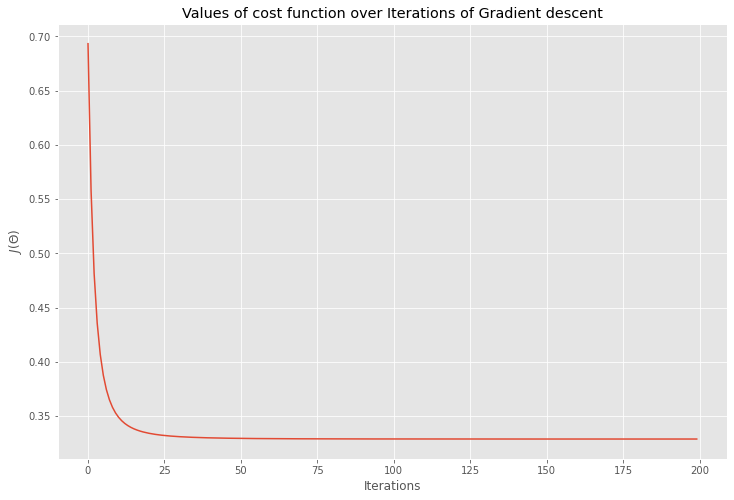

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$") #latex 
plt.title("Values of cost function over Iterations of Gradient descent");

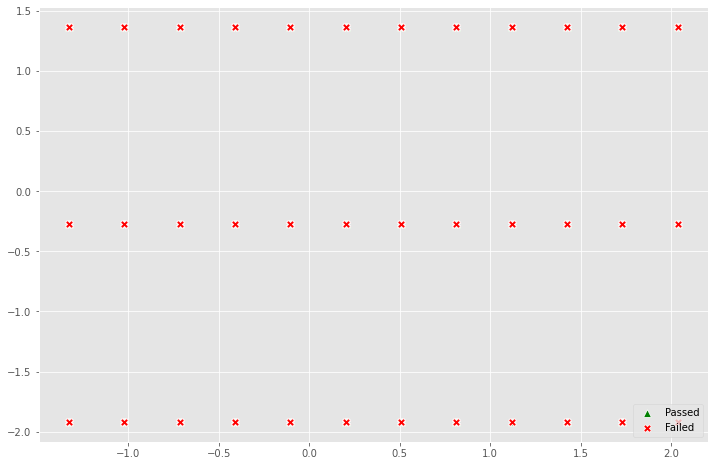

In [ ]:
#theta 1 is the intercept, othes theta2 onwards are coeff that multiply our features

#We are going to plot the decision boundry we got from logistics regression
#we gonna overlay it on top of our scatterplot

ax = sns.scatterplot(x = X[passed[:, 0], 1],
                     y = X[passed[:, 0], 2],
                     marker = "^",
                     color='green',
                     s = 60)
    #x and y reads all rows from passed from the zeroth and first value of scores
    #indices change after we append the row as well

sns.scatterplot(x = X[failed[:, 0], 1],
                     y = X[failed[:, 0], 2],
                     marker = "X",
                     color='red',
                     s = 60)

ax.legend(['Passed', 'Failed'])
#ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
#This above thing gives our scatterplot to out data points

#setting decision boundary
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

#sns.lineplot(x=x_boundary, y=y_boundary, color='blue')
plt.show();

In [ ]:
#It is a dot product in the equation

def Predict(theta, x):
    results = x.dot(theta)
    return results > 0 #return only the res which are greater than 0

#finding accuracy of model on trainingset
#i.e number of correct classifier 

In [ ]:
print(X)

[[ 1.         -0.10381968 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 [ 1.          1.42400783  1.3683719  ... -0.41145311 -0.25194037
   0.44489814]
 [ 1.         -0.71495069 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 ...
 [ 1.          0.20174582 -0.27576178 ...  1.43618859  1.05047333
  -0.56617504]
 [ 1.         -1.02051619 -0.27576178 ... -0.41145311 -0.25194037
   0.44489814]
 [ 1.         -0.71495069 -0.27576178 ...  1.4761376   4.52357654
  -1.57724822]]


In [ ]:
p = Predict(theta, X)

45211

28498
28584
28886
29182
30033
30324
30492
31773
34627
35209
36088
36712
37151
38068
38326
39876
39925
40106
40643
40889
41052
41889
42422
42497
42611
42716
42755
42851
43034
43064
43066
43069
43073
43107
43236
43304
43342
43464
43511
43561
43619
43687
43733
43907
43917
43925
43932
43934
43940
43960
43971
43979
44020
44038
44079
44089
44094
44120
44147
44159
44233
44239
44254
44273
44354
44367
44376
44438
44441
44446
44484
44491
44496
44497
44518
44530
44545
44626
44651
44667
44696
44698
44754
44798
44802
44810
44815
44822
44829
44837
44840
44864
44865
44868
44872
44907
44942
44965
44974
45002
45021
45036
45037
45075
45120
45126
45146
45150
45171


In [ ]:

Age = int(input('Enter Age: '))
balance = int(input('Enter Balance: '))
day = int(input('Enter day: '))
month = int(input('Enter month: '))
duration = int(input('Enter duration: '))
#['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','campaign', 'pdays', 'previous', 'poutcome']


"\nAge = int(input('Enter Age: '))\nbalance = int(input('Enter Balance: '))\nday = int(input('Enter day: '))\nmonth = int(input('Enter month: '))\nduration = int(input('Enter duration: '))\n#['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','campaign', 'pdays', 'previous', 'poutcome']\n"

In [ ]:
#import random
#randomlist = [0, 1, 3, 0, 0, 0, 0, 3, -1 ,0, 3]
'''
for i in range(5):
    x = random.random()
    randomlist.append(x)
'''
randomlist = [Age, balance, day, month, duration]

print(randomlist)


[3, 1, 2, 0, 0, 0, 0, 3, -1, 0, 3]


In [ ]:
#predictive analysis

test = np.array(randomlist)
test = (test - mean_scores) / std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))

print("A person who scores ", 
      np.round(probability[0], 2), "probablity of taking the term deposit")

A person who scores  0.19 probablity of taking the term deposit
